# Q8.Using the data from Question 5, write code the analyze the data and answer the following questions 

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
2. Get all the episode names, whose average rating is more than 8 for every season
3. Get all the episode names that aired before May 2019
4. Get the episode name from each season with the highest and lowest rating
5. Get the summary for the most popular ( ratings ) episode in every season

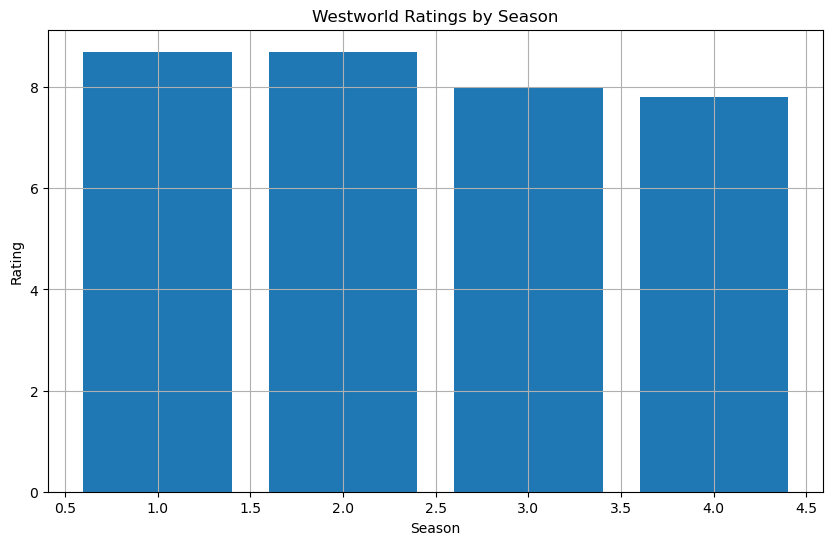

Season 1:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2:
- Kiksuya
- Vanishing Point
- The Passenger

Episodes aired before May 2019:
- The Original
- Chestnut
- The Stray
- Dissonance Theory
- Contrapasso
- The Adversary
- Trompe L'Oeil
- Trace Decay
- The Well-Tempered Clavier
- The Bicameral Mind
- Journey Into Night
- Reunion
- Virtù e Fortuna
- The Riddle of the Sphinx
- Akane No Mai
- Phase Space
- Les Écorchés
- Kiksuya
- Vanishing Point
- The Passenger

Season 1:
Highest Rated Episode: The Bicameral Mind (Rating: 8.7 )
Lowest Rated Episode: The Stray (Rating: 7.6 )

Season 2:
Highest Rated Episode: Kiksuya (Rating: 8.7 )
Lowest Rated Episode: Akane No Mai (Rating: 7.6 )

Season 3:
Highest Rated Episode: Parce Domine (Rating: 8.0 )
Lowest Rated Episode: Decoherence (Rating: 7.5 )

Season 4:
Highest Rated Episode: Zhuangzi (Rating: 7.8 )
Lowest Rated Episode: The Auguries (Rating: 7.1 )

Season 1:
Most Popular Episode: The Bicameral Mind
Rating: 8.7
S

In [1]:
import requests
import matplotlib.pyplot as plt

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()


seasons = [episode['season'] for episode in data['_embedded']['episodes']]
ratings = [float(episode['rating']['average']) for episode in data['_embedded']['episodes']]

plt.figure(figsize=(10, 6))
plt.bar(seasons, ratings)
plt.title("Westworld Ratings by Season")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


episode_names = {}

for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    
    if rating > 8:
        if season in episode_names:
            episode_names[season].append(episode_name)
        else:
            episode_names[season] = [episode_name]

for season, episodes in episode_names.items():
    print(f"Season {season}:")
    for episode in episodes:
        print(f"- {episode}")
    print()


episodes_before_may_2019 = [episode['name'] for episode in data['_embedded']['episodes'] if episode['airdate'] < '2019-05']

print("Episodes aired before May 2019:")
for episode in episodes_before_may_2019:
    print("- " + episode)
print()


highest_rated_episodes = {}
lowest_rated_episodes = {}

for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    
    if season in highest_rated_episodes:
        if rating > float(highest_rated_episodes[season]['rating']):
            highest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    else:
        highest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    
    if season in lowest_rated_episodes:
        if rating < float(lowest_rated_episodes[season]['rating']):
            lowest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    else:
        lowest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}

for season in highest_rated_episodes:
    print(f"Season {season}:")
    print("Highest Rated Episode:", highest_rated_episodes[season]['episode'], "(Rating:", highest_rated_episodes[season]['rating'], ")")
    print("Lowest Rated Episode:", lowest_rated_episodes[season]['episode'], "(Rating:", lowest_rated_episodes[season]['rating'], ")")
    print()


most_popular_episodes = {}

for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    summary = episode['summary']
    
    if season in most_popular_episodes:
        if rating > float(most_popular_episodes[season]['rating']):
            most_popular_episodes[season] = {'episode': episode_name, 'rating': rating, 'summary': summary}
    else:
        most_popular_episodes[season] = {'episode': episode_name, 'rating': rating, 'summary': summary}

for season in most_popular_episodes:
    print(f"Season {season}:")
    print("Most Popular Episode:", most_popular_episodes[season]['episode'])
    print("Rating:", most_popular_episodes[season]['rating'])
    print("Summary:", most_popular_episodes[season]['summary'])
    print()
